 Logistic Regression

In [14]:
import pandas as pd

In [15]:
file_path = r'hw1_q2_data.csv'
df = pd.read_csv(file_path)

In [16]:
print(df)

                Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0       -Andy Allanson    293    66      1    30   29     14      1     293   
1          -Alan Ashby    315    81      7    24   38     39     14    3449   
2         -Alvin Davis    479   130     18    66   72     76      3    1624   
3        -Andre Dawson    496   141     20    65   78     37     11    5628   
4    -Andres Galarraga    321    87     10    39   42     30      2     396   
..                 ...    ...   ...    ...   ...  ...    ...    ...     ...   
317      -Willie McGee    497   127      7    65   48     37      5    2703   
318   -Willie Randolph    492   136      5    76   50     94     12    5511   
319    -Wayne Tolleson    475   126      3    61   43     52      6    1700   
320     -Willie Upshaw    573   144      9    85   60     78      8    3198   
321     -Willie Wilson    631   170      9    77   44     31     11    4908   

     CHits  ...  CRuns  CRBI  CWalks  League Divisi

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [18]:
print("No. of Rows",df.shape[0])
print("No. of Columns",df.shape[1])

No. of Rows 322
No. of Columns 21


### 4. Does the data have any missing values? How many are missing? Print the number of missing values.
##### In pandas, check out isnul() and isnul().sum()


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [20]:
null_val=df.isnull().sum()
print(null_val.sum())

59


In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
df.shape

(263, 21)

In [23]:
print(df.isnull().sum())

Player       0
AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


In [24]:
features = df.drop('NewLeague',axis=1)
labels = df["NewLeague"]

In [25]:
features.drop('Player',axis=1,inplace=True)

In [26]:
features.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0


In [27]:
labels.head()

1    N
2    A
3    N
4    N
5    A
Name: NewLeague, dtype: object

In [28]:
data_obj1=features.select_dtypes(exclude=['int64','float64'])

In [29]:
data_obj1.head()

,League,Division
1,N,W
2,A,W
3,N,E
4,N,E
5,A,W


In [30]:
data_obj2=features.select_dtypes(include=['int64','float64'])

In [31]:
data_obj2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [32]:
print(data_obj1.value_counts('Division'))
print(data_obj1.value_counts('League'))

Division
W    134
E    129
dtype: int64
League
A    139
N    124
dtype: int64


In [33]:
data_dummy1=pd.get_dummies(data_obj1)
data_dummy1.head()

,League_A,League_N,Division_E,Division_W
1,0,1,0,1
2,1,0,0,1
3,0,1,1,0
4,0,1,1,0
5,1,0,0,1


In [34]:
data_dummy1.shape

(263, 4)

In [35]:
data_obj2.shape

(263, 17)

In [36]:
data_new=pd.concat([data_dummy1,data_obj2],axis=1,ignore_index=True).reset_index()
data_new.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1,0,1,0,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
1,2,1,0,0,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
2,3,0,1,1,0,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
3,4,0,1,1,0,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
4,5,1,0,0,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [37]:
data_new.drop(columns=['index'],inplace=True)
data_new.shape

(263, 21)

In [38]:
labels.shape

(263,)

In [39]:
replace_dict = {'A': 0, 'N': 1}
labels.replace(to_replace=replace_dict,inplace=True)

In [40]:
labels.head()

1    1
2    0
3    1
4    1
5    0
Name: NewLeague, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(data_new,labels,test_size=0.2,random_state=30)

In [43]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(210, 21)
(210,)
(53, 21)
(53,)


In [44]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [45]:
log_reg=LogisticRegression()
log_reg.fit(xtrain,ytrain)
ypred_log=log_reg.predict(xtest)
print('Testing Accuracy of Logistic Regression:',accuracy_score(ytest,ypred_log))

Testing Accuracy of Logistic Regression: 0.5849056603773585


In [46]:
ypred_log

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [47]:
logistic_coef = log_reg.coef_

In [48]:
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred_lin=lin_reg.predict(xtest)

In [49]:
ypred_lin

array([ 0.78982646, -0.06540186,  0.10219788,  0.03522899, -0.02251741,
        0.14706496, -0.0011352 , -0.02103582,  1.00386009,  0.85280139,
        0.74691693,  0.92917831,  0.03771497,  0.06495399,  0.03385135,
        1.00183608,  0.15971671,  0.8813806 ,  0.28694459,  0.09546937,
        0.07031923,  0.98287766,  0.00724707, -0.02292363,  0.09995106,
        0.05480465,  0.96709791,  0.93742351,  0.00307152,  0.0497751 ,
        0.99437001, -0.03743984,  0.16384555,  0.89642322,  0.0742902 ,
       -0.08817506,  0.96912527,  1.04294733, -0.0686312 ,  0.06502587,
        0.93302507, -0.09183446,  0.85583434, -0.04678785, -0.00826499,
        0.19786031,  0.07064001,  0.96395259,  0.86108421,  0.93096668,
        0.8848538 ,  1.00476409,  0.95142923])

In [50]:
linear_coef=lin_reg.coef_

In [51]:
print(linear_coef)
print('\n')
print(logistic_coef)

[-4.33276757e-01  4.33276757e-01 -8.04539117e-03  8.04539117e-03
  1.03371878e-03 -3.89092099e-03 -9.20576739e-03  2.67476311e-03
  1.41958178e-03  1.02395457e-03 -2.25745256e-03 -1.18679206e-04
  1.36227231e-03  2.08664117e-03 -1.54600894e-03 -9.08154594e-04
  1.52288898e-04  2.44323111e-06 -9.91347617e-05 -4.95823521e-03
 -1.65537896e-05]


[[-1.12195106e-02  1.09133817e-02  1.13266835e-04 -4.19395701e-04
   2.67219534e-03 -1.34312488e-02 -1.28156262e-02 -1.00842807e-02
  -1.46424785e-02  3.43958792e-02 -8.64666161e-03 -1.11038945e-03
   1.12037765e-02  7.30374081e-03 -1.34796987e-02 -2.73817519e-03
   1.13218730e-05  8.66434028e-04  4.99458942e-04  1.11688866e-02
   2.38303991e-04]]


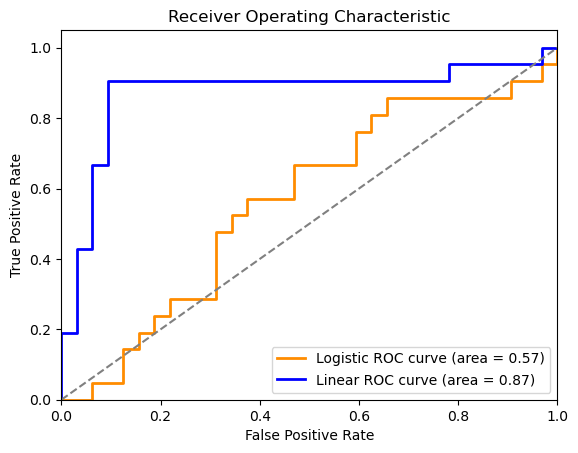

In [52]:
from sklearn.metrics import roc_curve,auc, roc_auc_score
import matplotlib.pyplot as plt
ypred_prob_log=log_reg.predict_proba(xtest)[:,1]

# Calculate ROC curve for logistic regression
log_fpr, log_tpr, _ = roc_curve(ytest,ypred_prob_log)
log_roc_auc = auc(log_fpr,log_tpr)

# Calculate ROC curve for linear regression
lin_fpr, lin_tpr, _ = roc_curve(ytest,ypred_lin)
lin_roc_auc = auc(lin_fpr,lin_tpr)

# Plot ROC curves
plt.figure()
plt.plot(log_fpr,log_tpr, color='darkorange', lw=2, label='Logistic ROC curve (area = %0.2f)' %log_roc_auc)
plt.plot(lin_fpr,lin_tpr, color='blue', lw=2, label='Linear ROC curve (area = %0.2f)' %lin_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

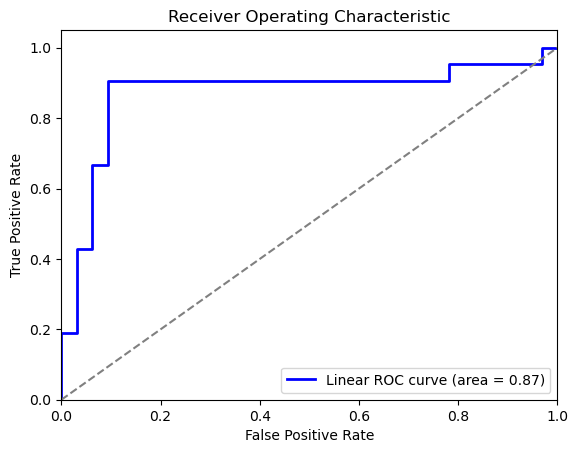

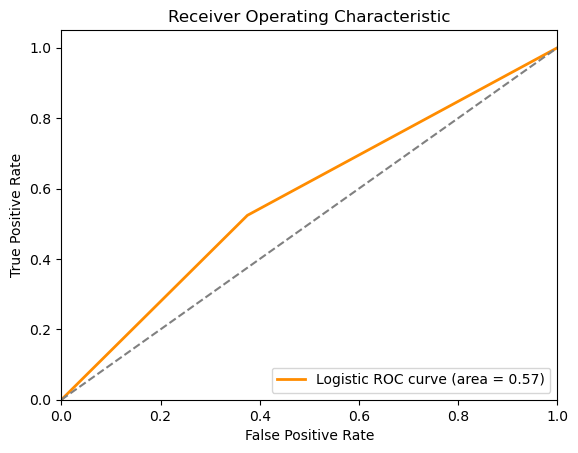

area under the curve for Linear Reg Model=  0.8720238095238095
area under the curve for Logistic Reg Model=  0.5744047619047619
Optimal Threshold for Linear Model=  1.0429473287101045
Optimal Threshold for Logistic Model=  1
Optimal f1 score for Linear Model=  0.0
Optimal f1 score for Logistic Model=  0.0


In [53]:
from sklearn.metrics import *
import numpy as np
from typing import Tuple, List

def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    
    ypred_lin=linear_model.predict(x_test)
    lin_fpr, lin_tpr,lin_thresholds = roc_curve(y_test,ypred_lin)
    lin_roc_auc = auc(lin_fpr,lin_tpr)
    auroc_linear = roc_auc_score(y_test, ypred_lin)
    
    plt.figure()
    plt.plot(lin_fpr,lin_tpr, color='blue', lw=2, label='Linear ROC curve (area = %0.2f)' %auroc_linear)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


    return ypred_lin,lin_fpr,lin_tpr,lin_thresholds,auroc_linear


def logistic_pred_and_area_under_curve(logistic_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    
    ypred_log=logistic_model.predict(x_test)
    log_fpr,log_tpr,log_thresholds=roc_curve(y_test,ypred_log)
    log_roc_auc=auc(log_fpr,log_tpr)
    auroc_logistic = roc_auc_score(y_test, ypred_log)
    
    plt.figure()
    plt.plot(log_fpr,log_tpr, color='darkorange', lw=2, label='Logistic ROC curve (area = %0.2f)' %auroc_logistic)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return ypred_log,log_fpr,log_tpr,log_thresholds,auroc_logistic






linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(lin_reg, xtest, ytest)

log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(log_reg, xtest, ytest)


print('area under the curve for Linear Reg Model= ', linear_reg_area_under_curve )
print('area under the curve for Logistic Reg Model= ', log_reg_area_under_curve )

#linear
lin_optimal_thresold = linear_threshold[np.argmax(log_reg_tpr-log_reg_fpr)]
lin_optimal_ypred = (ypred_lin > lin_optimal_thresold).astype(int)
lin_f1_score_optimal = f1_score(ytest, lin_optimal_ypred)


#logistic
log_optimal_thresold = log_threshold[np.argmax(log_reg_tpr-log_reg_fpr)]
log_optimal_ypred = (ypred_log > log_optimal_thresold).astype(int)
log_f1_score_optimal = f1_score(ytest, log_optimal_ypred)


print('Optimal Threshold for Linear Model= ', lin_optimal_thresold)
print('Optimal Threshold for Logistic Model= ', log_optimal_thresold)

print('Optimal f1 score for Linear Model= ',lin_f1_score_optimal)
print('Optimal f1 score for Logistic Model= ',log_f1_score_optimal)

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

num_folds= 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)


def train_test_folds(skf, num_of_folds: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    
    num_of_folds = num_of_folds
    max_iter = 100000008

    X = data_new
    y = labels
    auc_log_score = []
    auc_linear_score = []
    features_count = []
    f1_log= []
    f1_linear= []

    model1=LogisticRegression(penalty='l2', C=1/12, solver='liblinear')
    model2=LinearRegression()


    # Iterate through the SKfolds
    for fold, (train_indices, val_indices) in enumerate(skf.split(X, y)):
        print(f"Fold {fold+1}:")
        # print(X.shape)
        # print(y.shape)
        # print(train_indices)
        #print(val_indices)
        X=np.array(X)
        y=np.array(y)

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        num_features=X_train.shape[1]
    # Train the model
        model1.fit(X_train, y_train)
        model2.fit(X_train,y_train)

    # Validate the model
        y_pred_log=model1.predict(X_val)
        y_pred_lin=model2.predict(X_val)
        f1= f1_score(y_val, y_pred_log)
        f2=0
        log_fpr,log_tpr,thresholds=roc_curve(y_val,y_pred_log)
#         log_auc=auc(log_fpr,log_tpr)
        auroc_lo_score = roc_auc_score(y_val, y_pred_log)
        
        lin_fpr,lin_tpr,thresholds=roc_curve(y_val,y_pred_lin)
#         lin_auc=auc(log_fpr,log_tpr)
        auroc_li_score = roc_auc_score(y_val, y_pred_lin)

        f1_log.append(f1)
        f1_linear.append(f2)
        features_count.append(num_features)
        auc_log_score.append(auroc_lo_score)
        auc_linear_score.append(auroc_li_score)




    return features_count, auc_log_score, auc_linear_score, f1_log,f1_linear



num_folds= 5
# skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)
features_count, auc_log_score, auc_linear_score, f1_log, f1_linear = train_test_folds(skf, num_folds)
print(features_count, auc_log_score, auc_linear_score, f1_log, f1_linear)

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
[21, 21, 21, 21, 21] [0.9421428571428572, 0.9085714285714286, 0.8857758620689655, 0.9404761904761905, 0.9255952380952381] [0.95, 0.8985714285714286, 0.9166666666666666, 0.9464285714285714, 0.9598214285714286] [0.9387755102040817, 0.9056603773584904, 0.875, 0.9361702127659574, 0.9199999999999999] [0, 0, 0, 0, 0]


In [56]:
def is_features_count_changed(features_count: np.array) -> bool:
  
    feature_set = set(features_count)
    if len(feature_set)!=len(features_count):
        print('True')
    else:
        print('False')
    

is_features_count_changed(features_count)

True


In [57]:
def mean_confidence_interval(score_array: np.array, confidence=0.95) -> Tuple[float, float, float]:

    mean = np.mean(score_array)
    UB = mean + 1.96*(np.std(score_array)/len(score_array))
    LB = mean - 1.96*(np.std(score_array)/len(score_array))
    
    ci = [mean, LB, UB]
    return ci

In [58]:
auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the AUROCs for linear model= '    , mean_confidence_interval(auc_log_score))
print('mean and 95% confidence interval for the AUROCs for logistic model= '  , mean_confidence_interval(auc_log_score))

mean and 95% confidence interval for the AUROCs for linear model=  [0.920512315270936, 0.9122125009917429, 0.9288121295501292]
mean and 95% confidence interval for the AUROCs for logistic model=  [0.920512315270936, 0.9122125009917429, 0.9288121295501292]


In [59]:
f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_linear))
print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_log))

mean and 95% confidence interval for the f1 score for linear model=  [0.0, 0.0, 0.0]
mean and 95% confidence interval for the f1 score for linear model=  [0.915121220065706, 0.9059688672721727, 0.9242735728592392]


In [ ]:
#end